In [1]:
"""
    Essa seção é dedicada apenas para a importação das bibliotecas necessárias para
    resolução do desafio.
"""
from matplotlib.pyplot import axis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastparquet

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics, preprocessing
from feature_importance import plot_importance
from data_balancer import DataBalancer
from data_preparation import DataPreparation
from exploratory_analisys import ExploratoryAnalisys
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [2]:
verbose = True

In [3]:
"""
    Aqui é dedicada uma seção para a leitura e visualização bruta e inicial dos dados
    no formato de tabela.
"""
input_data = pd.read_parquet('dataset_cdjr.parquet.gzip')
#display(input_data.head(10))

In [4]:
'''
    Foi criada uma classe responsável apenas pela parte de Análise Exploratória dos Dados, denomidada
    ExploratoryAnalisys cujo 'construtor' recebe os dados de entrada.
'''
exploratory_analisys = ExploratoryAnalisys(input_data,verbose=verbose)
print(exploratory_analisys.describe_data())

'''
    Aqui visualizamos o comportamento 'temporal' das variáveis, já na tentativa de buscar insights mais visuais
    como outliers, etc...
'''
exploratory_analisys.view_time_series()
'''
    Posteriormente, crio os histogramas de cada uma das variáveis para entender melhor, e de maneira mais clara, como estão distribuídas.
'''
exploratory_analisys.view_histograms()
'''
    Na sequência, decido observar o nível de correlação das minhas variáveis de entrada com a minha target.
'''
exploratory_analisys.view_corr_plot()
'''
    Por fim, como se trata de um problema de classificação, vejo se temos um problema balanceado ou desbalanceado
'''
exploratory_analisys.view_target_distribuition()

'''
    Criei um balanceador de dados manual mas optei por não utilizá-lo nesta resolução.
'''
to_balance = False
if to_balance:
    balancer = DataBalancer(input_data)
    input_data = balancer.balance()

           feature0    feature1      feature2     feature3      feature4  \
count    466.000000  466.000000    466.000000   466.000000    466.000000   
mean     438.743562    4.847639   1244.322468    44.600880   -434.299893   
std      984.593065    6.836679   3558.699033   122.093515    975.555198   
min        0.000000    0.000000      0.000000  -645.870000 -15506.350000   
25%       50.000000    1.000000      0.000000    -0.400000   -492.035000   
50%      150.000000    2.000000    169.830000    18.360000   -154.525000   
75%      500.000000    6.000000   1017.375000    44.630000    -50.180000   
max    15400.000000   31.000000  40291.240000  1521.900000     -0.260000   

         feature5      feature6    feature7    feature8      feature9  \
count  466.000000    466.000000  466.000000  466.000000  4.660000e+02   
mean     0.473991    979.070815    0.113885    3.857010  2.164378e+05   
std      0.452261   1460.738442    1.873746   15.609132  3.508622e+05   
min      0.150000      

In [5]:
preprocess = DataPreparation(input_data)
old_input = input_data.copy()
input_data = preprocess.pipeline_pre_process()

c:\Users\JoaoV\OneDrive\Área de Trabalho\PS-Americanas\Desafio-Americanas\feature_engineering.py:53: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [6]:
'''
    Criei novas features mas após testes, vi que não surtiram muito efeito
'''
features = ['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15']
#features = input_data.drop(columns={'target'}).columns
#X_train, x_test, y_train, y_test = train_test_split(input_data.drop(columns={'target'}),input_data['target'],train_size=0.8)
X_train, x_test, y_train, y_test = train_test_split(input_data[features],input_data['target'],train_size=0.70)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6711348	total: 175ms	remaining: 26s
1:	learn: 0.6454203	total: 186ms	remaining: 13.7s
2:	learn: 0.6224444	total: 204ms	remaining: 10s
3:	learn: 0.6031991	total: 225ms	remaining: 8.2s
4:	learn: 0.5867337	total: 233ms	remaining: 6.75s
5:	learn: 0.5691465	total: 243ms	remaining: 5.83s
6:	learn: 0.5537523	total: 252ms	remaining: 5.14s
7:	learn: 0.5368616	total: 261ms	remaining: 4.64s
8:	learn: 0.5218645	total: 272ms	remaining: 4.26s
9:	learn: 0.5120575	total: 280ms	remaining: 3.92s
10:	learn: 0.5047447	total: 293ms	remaining: 3.7s
11:	learn: 0.4966831	total: 307ms	remaining: 3.53s
12:	learn: 0.4807619	total: 323ms	remaining: 3.41s
13:	learn: 0.4672440	total: 337ms	remaining: 3.27s
14:	learn: 0.4593542	total: 350ms	remaining: 3.15s
15:	learn: 0.4513393	total: 369ms	remaining: 3.09s
16:	learn: 0.4439632	total: 379ms	remaining: 2.96s
17:	learn: 0.4344865	total: 388ms	remaining: 2.85s
18:	learn: 0.4249042	total: 396ms	remaining: 2.73s
19:	learn: 0.4148787	total: 404ms	remaining: 2.

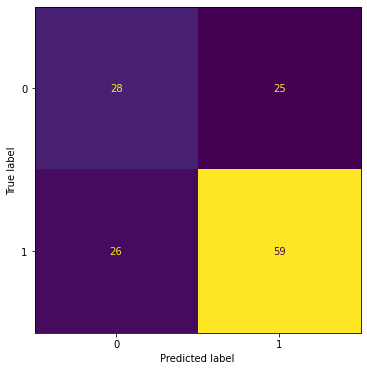

Model acc: 0.6304347826086957
ROC AUC CatBoost:  0.6104497354497355


In [7]:
ctb_model = CatBoostClassifier(iterations=150,
                                depth=8,
                                learning_rate=0.35,
                                loss_function='Logloss',
                                auto_class_weights='SqrtBalanced',
                                )
ctb_model.fit(X_train,y_train,plot=verbose)
ctb_predictions = ctb_model.predict(x_test)

print(classification_report(y_test,ctb_predictions))
'''
    Confusion Matrix
'''
if verbose:
    fig, ax = plt.subplots(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(
        y_test, ctb_predictions, labels=ctb_model.classes_, ax=ax, colorbar=False
    )
    plt.show()
print(f"Model acc: {accuracy_score(ctb_predictions,y_test)}")
print("ROC AUC CatBoost: ",metrics.roc_auc_score(ctb_predictions,y_test.values))

In [8]:
scores = cross_val_score(ctb_model, input_data[features],input_data['target'], cv=10)
print("Cross Validation (10) off Catboost: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0:	learn: 0.6674125	total: 10.9ms	remaining: 1.63s
1:	learn: 0.6435951	total: 20.4ms	remaining: 1.51s
2:	learn: 0.6192398	total: 29.4ms	remaining: 1.44s
3:	learn: 0.6031799	total: 36.4ms	remaining: 1.33s
4:	learn: 0.5823962	total: 43ms	remaining: 1.25s
5:	learn: 0.5648169	total: 49.6ms	remaining: 1.19s
6:	learn: 0.5445635	total: 56.4ms	remaining: 1.15s
7:	learn: 0.5287280	total: 63.8ms	remaining: 1.13s
8:	learn: 0.5155196	total: 71.9ms	remaining: 1.13s
9:	learn: 0.5046315	total: 79.8ms	remaining: 1.12s
10:	learn: 0.4951194	total: 89.6ms	remaining: 1.13s
11:	learn: 0.4817320	total: 96.5ms	remaining: 1.11s
12:	learn: 0.4728860	total: 105ms	remaining: 1.11s
13:	learn: 0.4653739	total: 112ms	remaining: 1.09s
14:	learn: 0.4584646	total: 120ms	remaining: 1.08s
15:	learn: 0.4497838	total: 126ms	remaining: 1.06s
16:	learn: 0.4423803	total: 133ms	remaining: 1.04s
17:	learn: 0.4359465	total: 140ms	remaining: 1.02s
18:	learn: 0.4291436	total: 146ms	remaining: 1.01s
19:	learn: 0.4211144	total: 152

In [9]:
plot_importance(ctb_model,features)